In [3]:
import random, math

In [4]:
def gen_i():
    return (random.uniform(0, 20), random.uniform(0, 60))

def gen_j():
    return (random.uniform(60, 80), random.uniform(0, 60))

def gen_p():
    def cdf_inv(x, a):
        return - math.log(1 - x) / a
    y = random.random()
    return cdf_inv(y, 1)

def d(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def snr(p, a, b):
    k = 2
    P_T = 5
    P_N = 3.2 * 10**(-5)
    return p * P_T * (d(a,b)**(-k)) / P_N

In [9]:
snr(gen_p(), gen_i(), gen_j())

39.41779326529292

In [10]:
def compute_prob(alpha, lim1, lim2):
    tot = 0
    ok = 0

    for iter_ij in range(lim1):
        i = gen_i()
        j = gen_j()
        for iter_p in range(lim2):
            p = gen_p()
            if snr(p, i, j) < alpha:
                ok += 1
            tot += 1
    return ok / tot

In [11]:
x = []
y = []
for i in range(1, 321):
    x.append(i)
    y.append(compute_prob(i, 1000, 50))

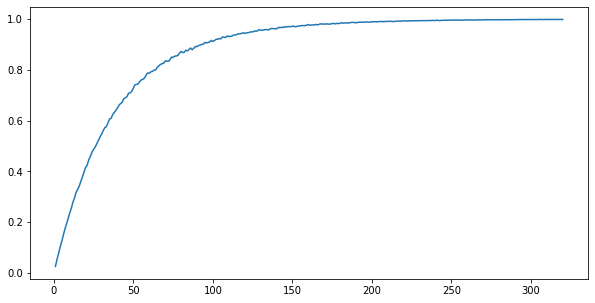

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.show()